# 프로젝트 1 - 당뇨병 수치를 맞춰보자!

### (프로젝트 1-1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes(as_frame=True)

df_X = diabetes.data
df_y = diabetes.target

### (프로젝트 1-2) 모델에 입력할 데이터 X준비하기 

In [2]:
np_X = df_X.values

### (프로젝트 1-3) 모델에 예측할 데이터 y준비하기

In [3]:
np_y = df_y.values

### (프로젝트 1-4) train데이터와 test데이터 분리하기

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, test_size=0.2, random_state=11 )

### (프로젝트 1-5) 모델 준비하기

In [5]:
W = np.random.rand(10)
b = np.random.rand()

def model( X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    
    return predictions

### (프로젝트 1-6) 손실함수 loss정의하기

In [6]:
def MSE(a,b):
    mse = ((a-b) **2 ).mean()
    #rmse = mse ** 0.5
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

### (프로젝트 1-7) 기울기를 구하는 gradient함수 구현하기

In [7]:
def gradient(X,W,b,y):
    N = len(W)
    
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred - y).mean()
    return dW, db

### (프로젝트 1-8) 하이퍼 파라미터인 학습률 설정하기

In [8]:
LEARNING_RATE = 0.001

### 프로젝트 1-9) 모델 학습하기

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

losses = []

for i in range(100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



Iteration 0 : Loss 28286.6354
Iteration 5000 : Loss 3080.7223
Iteration 10000 : Loss 2871.1253
Iteration 15000 : Loss 2825.6657
Iteration 20000 : Loss 2814.0534
Iteration 25000 : Loss 2810.4756
Iteration 30000 : Loss 2809.0984
Iteration 35000 : Loss 2808.4262
Iteration 40000 : Loss 2808.0181
Iteration 45000 : Loss 2807.7245
Iteration 50000 : Loss 2807.4884
Iteration 55000 : Loss 2807.2854
Iteration 60000 : Loss 2807.1045
Iteration 65000 : Loss 2806.9400
Iteration 70000 : Loss 2806.7886
Iteration 75000 : Loss 2806.6481
Iteration 80000 : Loss 2806.5173
Iteration 85000 : Loss 2806.3948
Iteration 90000 : Loss 2806.2798
Iteration 95000 : Loss 2806.1714
Iteration 100000 : Loss 2806.0689


### (프로젝트 1-10) test데이터에 대한 성능 확인하기

In [10]:
y_pred = model(X_test, W, b)        
mse = mean_squared_error(y_test, y_pred)
print(mse)

3261.9876572794074


### (프로젝트 1-11) 정답데이터와 예측한 데이터 시각화하기

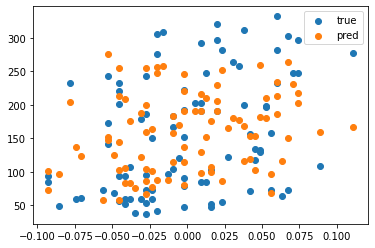

In [11]:
#x데이터 첫번째 컬럼, y축은 타겟 데이터 

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()

# 프로젝트#2

### (프로젝트 2-1) 데이터 가져오기 

In [12]:
import pandas as pd

train_csv= pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train_csv.describe()
train_csv.info()
train_csv[['season','holiday']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10881,4,0
10882,4,0
10883,4,0
10884,4,0


### (2)  datetime 컬럼 datetime 자료형으로 변환 연, 월, 일, 시, 분, 초 6가지 컬럼 생성

In [13]:
train_csv["datetime"] = pd.to_datetime(train_csv['datetime'])
train_csv['year'] = train_csv['datetime'].dt.year
train_csv['month'] = train_csv['datetime'].dt.month
train_csv['day'] = train_csv['datetime'].dt.day
train_csv['hour'] = train_csv['datetime'].dt.hour
train_csv['minute'] = train_csv['datetime'].dt.minute
train_csv['second'] = train_csv['datetime'].dt.second
train_csv.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기 

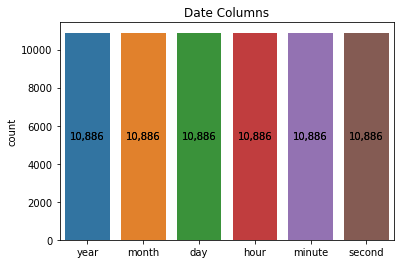

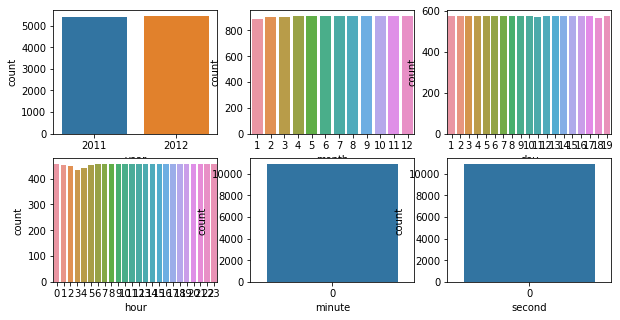

In [14]:
import seaborn as sns

ax = sns.countplot(data=train_csv[['year','month','day','hour','minute','second']])
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}'  for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Date Columns')
plt.show()

list = ['year','month','day','hour','minute','second']

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train_csv)
plt.subplot(2,3,2)
sns.countplot(x='month', data=train_csv)
plt.subplot(2,3,3)
sns.countplot(x='day',data=train_csv)
plt.subplot(2,3,4)
sns.countplot(x='hour',data=train_csv)
plt.subplot(2,3,5)
sns.countplot(x='minute', data=train_csv)
plt.subplot(2,3,6)
sns.countplot(x='second',data=train_csv)
plt.show()

### (4) X, y컬럼 선택 및 train/test 데이터 분리

In [15]:
train_csv.head()
y = train_csv[['count']].values 
X = train_csv[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1001)

### (5) LinearRegression 모델 학습

In [17]:
from sklearn.linear_model import LinearRegression
def model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

model = model(X_train, y_train)
model

LinearRegression()

### (6)학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [18]:
predictions = model.predict(X_test)
predictions

array([[112.41601271],
       [278.76215791],
       [205.47550246],
       ...,
       [362.13938445],
       [172.33152089],
       [ 73.13373701]])

In [19]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE : " , mse)
print("RMSE : " , rmse)

MSE :  20690.32458154474
RMSE :  143.84131736585542


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

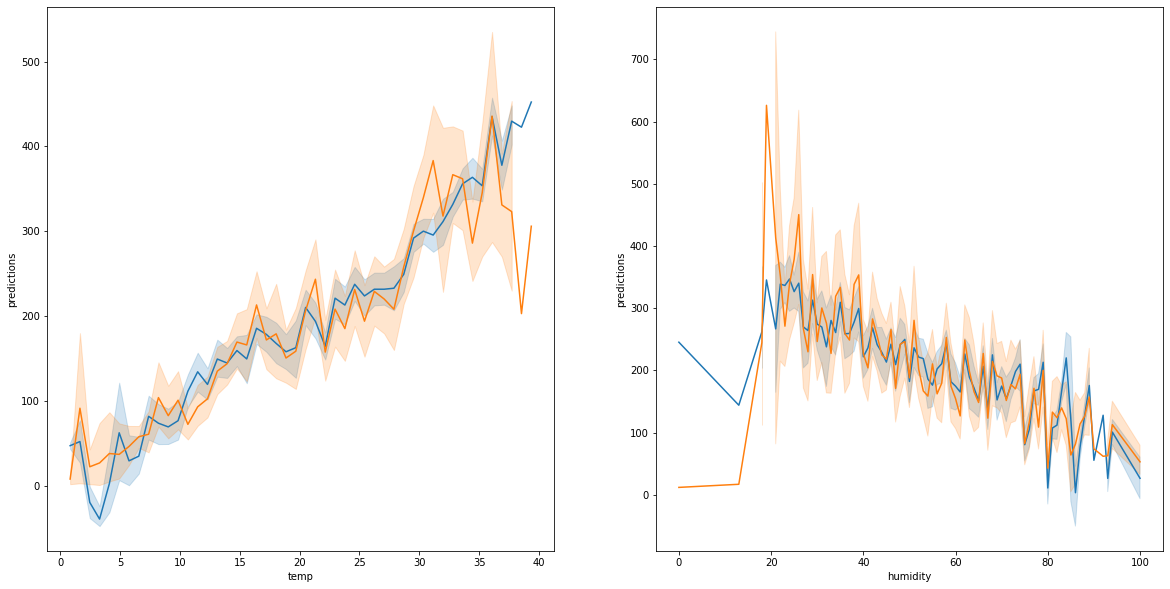

In [21]:
# seaborn plot multiple lines
import pandas as pd
import seaborn as sns

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax= sns.lineplot(x='temp', y='predictions', data=X_test_df)
ax1 = sns.lineplot(x='temp', y='y_test', data=X_test_df)
plt.subplot(1,2,2)
ax= sns.lineplot(x='humidity', y='predictions', data=X_test_df)
ax1 = sns.lineplot(x='humidity', y='y_test', data=X_test_df)

# 회고

1. csv파일을 로드하여 해당 데이터셋에 대한 설명을 확인할 수 있음

2. 수집된 데이터를 자료형으로 변환하는 방법 ( 이유는 나중에 알게됨 ) 
   문자열을 숫자로 변환하여 수학적인 계산을 통해 결과를 도출하는 머신러닝의 기반이기 때문으로 파악함

3. 하나의 그래프에 여러개의 하위 그래프를 쉽게 생성가능/ 생성하는 법을 알게됨

4. 분류와 선형모델을 생성하는 sklearn이 몇줄의 코딩으로 모델이 생성됨

5. 데이터 자료형이 행렬/스칼라/튜플등이 모두 같은 형태로 표현되어 데이터 흐름 파악이 쉽지 않음 
   많은 연습이 필요하다고 생각함

6. 손실함수를 직접계산하는 방법을 사용하여 원리를 접할 수 있는 귀한 기회였다고 생각함
   로그함수,지수함수등 좀 더 공부가 필요하다고 느낌.
   